In [8]:
from principal_RBM_alpha import * 
import torch
import numpy as np
from time import time

In [2]:
device = torch.device('cuda') if torch.cuda.is_available else 'cpu'

### Visualisation du préentrainement d'une RBM sur BinaryAlphaDigits

Nous allons visualiser l'entrainement de notre RBM sur la base de données BinaryAlphadigits. Dans un premier temps, on considère le préentrainement sur le nombre $8$

In [3]:
index = 8 
X  = lire_alpha_digit(index, device)

In [4]:
print('Les données contiennent:')
print(f'{X.size(0)} examples')
print(f'{X.size(1)} pixels')


Les données contiennent:
39 examples
320 pixels


In [58]:

p = X.size(1) #Nombre de pixels
qs = [10,100,500] #Test de différents nombres de neuronnes dans la couche cachée
batch_size = 10 #Le nombre de données par batch
lr = 0.01 #Le pas dans la gradient ascent
epochs = 1000 #Le nombre d'itérations (nombre de fois que le modèle voit toutes les données)
n_images = 2 #Nombre d'images à générer une fois la RBM entrainée
gibbs_iter = 1000 #Nombre d'itération dans le gibbs sampler pour générer une image

historique = []
images = []
times = []

for q in qs : 
    t0 = time()
    print(f'RBM avec {q} neuronnes')
    RBM = init_RBM(p, q, device)
    trained_RBM, history = train_RBM(X, RBM, epochs, lr, batch_size)
    historique.append(history)
    gen_images = generer_image_RBM(trained_RBM, gibbs_iter, n_images, plot = False)
    print('')
    times.append(time()-t0)
    images.append(gen_images)

RBM avec 10 neuronnes
EPOCH 0 - Reconstruction Error: 70.0247
EPOCH 50 - Reconstruction Error: 48.6949
EPOCH 100 - Reconstruction Error: 42.8670
EPOCH 150 - Reconstruction Error: 38.0101
EPOCH 200 - Reconstruction Error: 35.0452
EPOCH 250 - Reconstruction Error: 32.7764
EPOCH 300 - Reconstruction Error: 31.2469
EPOCH 350 - Reconstruction Error: 30.0519
EPOCH 400 - Reconstruction Error: 29.3266
EPOCH 450 - Reconstruction Error: 28.6723
EPOCH 500 - Reconstruction Error: 28.1402
EPOCH 550 - Reconstruction Error: 27.6651
EPOCH 600 - Reconstruction Error: 27.3789
EPOCH 650 - Reconstruction Error: 27.0714
EPOCH 700 - Reconstruction Error: 26.8848
EPOCH 750 - Reconstruction Error: 26.5361
EPOCH 800 - Reconstruction Error: 26.3879
EPOCH 850 - Reconstruction Error: 26.2243
EPOCH 900 - Reconstruction Error: 26.0545
EPOCH 950 - Reconstruction Error: 25.8386

RBM avec 100 neuronnes
EPOCH 0 - Reconstruction Error: 57.6308
EPOCH 50 - Reconstruction Error: 13.4349
EPOCH 100 - Reconstruction Error: 4.

In [59]:
print(f'Training time (GPU) 10 neuronnes: {times[0]:0.3f} seconds')
print(f'Training time (GPU) 100 neuronnes: {times[1]:0.3f} seconds')
print(f'Training time (GPU) 500 neuronnes: {times[2]:0.3f} seconds')

Training time (GPU) 10 neuronnes: 4.011 seconds
Training time (GPU) 100 neuronnes: 4.055 seconds
Training time (GPU) 500 neuronnes: 3.966 seconds


Le temps d'entraînement n'augmente presque pas avec le nombre de neuronnes. Cela est probablement du à l'utilisation du GPU par Pytorch

Text(0, 0.5, 'Reconstruction Error')

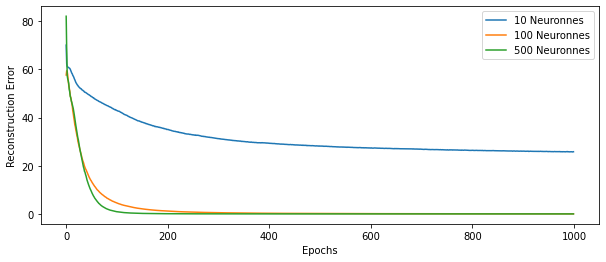

In [60]:
plt.figure(figsize = (10,4))
plt.plot(historique[0], label = '10 Neuronnes')
plt.plot(historique[1], label = '100 Neuronnes')
plt.plot(historique[2], label = '500 Neuronnes')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Error')


Nous voyons qu'une RBM avec 10 neuronnes ne convergent pas, tandis qu'une RBM avec 100 ou 500 neuronnes convergent vers une erreur de reconstruction très faible. Par ailleurs, l'utilisation de 500 neuronnes permet une convergence plus rapide.

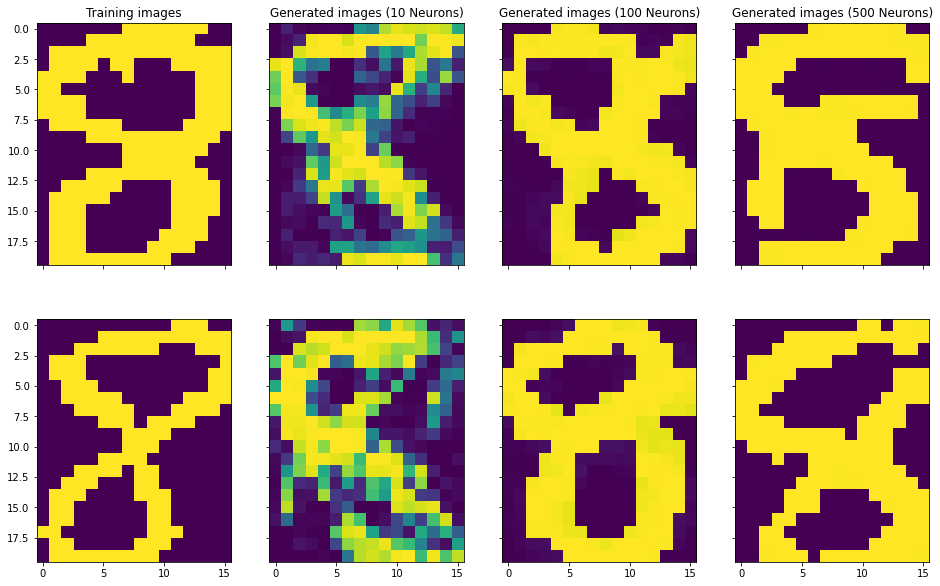

In [61]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, sharex = True, sharey = True, figsize = (16,10))

ax[0,0].imshow(X[0].view(20,16).cpu().numpy())
ax[1,0].imshow(X[10].view(20,16).cpu().numpy())
ax[0,0].set_title('Training images')

ax[0,1].imshow(images[0][0])
ax[1,1].imshow(images[0][1])
ax[0,1].set_title('Generated images (10 Neurons)')

ax[0,2].imshow(images[1][0])
ax[1,2].imshow(images[1][1])
ax[0,2].set_title('Generated images (100 Neurons)')

ax[0,3].imshow(images[2][0])
ax[1,3].imshow(images[2][1])
_=ax[0,3].set_title('Generated images (500 Neurons)')


Les RBM avec 100 et 500 neuronnes génèrent des images aussi proche que celles utilisées pourt l'entraînement.